###**(1) 데이터 가져오기**

*   터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import datetime as dts

df = pd.read_csv("~/data/data/bike-sharing-demand/train.csv")
print(df)

                  datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000 

###**(2)  datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기**

*   to_datetime 활용
*   연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성

In [2]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.hour
df['second'] = df['datetime'].dt.second
df['datetime'] = df['datetime'].map(dts.datetime.toordinal)

print(df)

       datetime  season  holiday  workingday  weather   temp   atemp  \
0        734138       1        0           0        1   9.84  14.395   
1        734138       1        0           0        1   9.02  13.635   
2        734138       1        0           0        1   9.02  13.635   
3        734138       1        0           0        1   9.84  14.395   
4        734138       1        0           0        1   9.84  14.395   
...         ...     ...      ...         ...      ...    ...     ...   
10881    734856       4        0           1        1  15.58  19.695   
10882    734856       4        0           1        1  14.76  17.425   
10883    734856       4        0           1        1  13.94  15.910   
10884    734856       4        0           1        1  13.94  17.425   
10885    734856       4        0           1        1  13.12  16.665   

       humidity  windspeed  casual  registered  count  year  month  day  hour  \
0            81     0.0000       3          13     16 

###**(3)  year, month, day, hour, minute, second 데이터 개수 시각화하기**

*   sns.countplot 활용해서 시각화하기
*   subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

<AxesSubplot:xlabel='second', ylabel='count'>

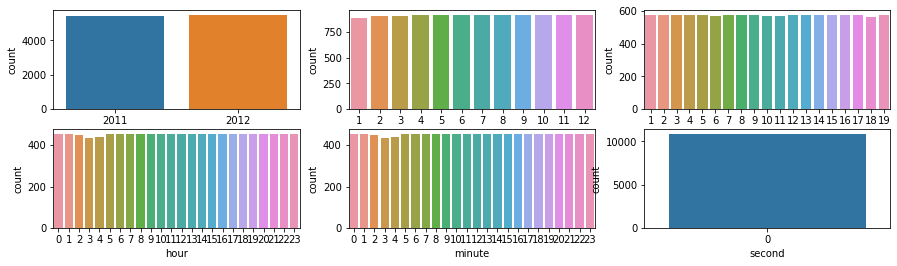

In [3]:
plt.figure(figsize=(15,4))

plt.subplot(2, 3, 1)
sns.countplot(x="year", data=df)

plt.subplot(2, 3, 2)
sns.countplot(x="month", data=df)

plt.subplot(2, 3, 3)
sns.countplot(x="day", data=df)

plt.subplot(2, 3, 4)
sns.countplot(x="hour", data=df)

plt.subplot(2, 3, 5)
sns.countplot(x="minute", data=df)

plt.subplot(2, 3, 6)
sns.countplot(x="second", data=df)

###**(4) X, y 컬럼 선택 및 train/test 데이터 분리**

*   x 변수에 적절히 데이터 삭제
*   count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

In [4]:
# X = df.drop(['casual', 'registered', 'workingday'],axis=1) # 원본 코드
X = df.drop(['casual', 'registered', 'workingday', 'count'],axis=1)
y = df['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=34)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7620, 15) (7620,)
(3266, 15) (3266,)


###**(5) LinearRegression 모델 학습**

*   sklearn의 LinearRegression 모델 불러오기 및 학습하기

In [5]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

###**(6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산**

*   학습된 모델에 X_test를 입력해서 예측값 출력하기
*   모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
*   mse 값과 함께 rmse 값도 계산하기

In [6]:
predictions = model.predict(X_test)

print(predictions)

mse = mean_squared_error(y_test, predictions)

print(mse)
print(np.sqrt(mse))

[197. 123.  41. ... 423.  51.  57.]
2.951821213953374e-26
1.7180864978089357e-13


###**(7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기**

*   x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
*   x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

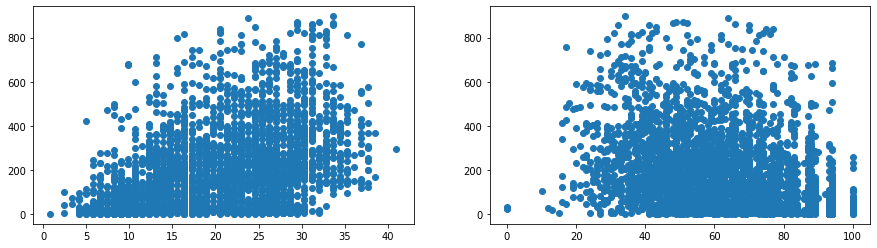

In [7]:
# 지금 하는 것은 학습 동향성 확인을 위한 코드이므로 label과 prediction 간의 차이를 나타내어야 합니다.
# 고로 y값에 대한 시각화도 포함되어야 합니다.
plt.figure(figsize=(15,4))

plt.subplot(1, 2, 1)
plt.scatter(X_test['temp'], predictions)
plt.scatter(X_test['temp'], y_test)# 추가된 코드

plt.subplot(1, 2, 2)
plt.scatter(X_test['humidity'], predictions)
plt.scatter(X_test['humidity'], y_test)# 추가된 코드